In [6]:
import opendatasets as od

In [7]:
url="https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset/download?datasetVersionNumber=1"

In [ ]:
od.download(url)

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-06 15:22:50.161890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
plt.rcParams['font.size'] = 16

In [3]:
path = "fashion-product-images-dataset/fashion-dataset/fashion-dataset/images"
images_df = pd.read_csv("fashion-product-images-dataset/fashion-dataset/fashion-dataset/images.csv")

In [4]:
styles_df = pd.read_csv("fashion-product-images-dataset/fashion-dataset/fashion-dataset/styles.csv", on_bad_lines ='skip')


In [5]:
styles_df['filename'] = styles_df['id'].astype('str')+'.jpg'
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName   filename  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg

In [6]:
image_files = os.listdir(path)

In [7]:
styles_df['present'] = styles_df['filename'].apply(lambda x: x in image_files)

In [8]:
styles_df = styles_df[styles_df['present']].reset_index(drop=True)
styles_df

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44414  17036    Men       Footwear       Shoes           Casual Shoes   
44415   6461    Men       Footwear  Flip Flops             Flip Flops   
44416  18842    Men        Apparel     Topwear                Tshirts   
44417  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44418  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44414      White  Summer  2013.0  Casual   
44415        Red  Summer  2011.0  Casual   
44416       Blue    Fall  2011.0  Casual   
44417       Blue  Spring  2017.0  Casual   
44418       Pink  Winter  2016.0  Casual   

                                    productDisplayName   filename  present  
0                     Turtle Check Men Navy Blue Shirt  15970.jpg     True  
1                   Peter England Men Party Blue Jeans  39386.jpg     True  
2                             Titan Women Silver Watch  59263.jpg     True  
3        Manchester United Men Solid Black Track Pants  21379.jpg     True  
4                                Puma Men Grey T-shirt  53759.jpg     True  
...                                                ...        ...      ...  
44414                        Gas Men Caddy Casual Shoe  17036.jpg     True  
44415               Lotto Men's Soccer Track Flip Flop   6461.jpg     True  
44416             Puma Men Graphic Stellar Blue Tshirt  18842.jpg     True  
44417                   Rasasi Women Blue Lady Perfume  46694.jpg     True  
44418  Fossil Women Pink Dial Chronograph Watch ES3050  51623.jpg     True  

[44419 rows x 12 columns]

In [9]:
img_size = 224
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_dataframe(dataframe = styles_df,
                                       directory = path,
                                       target_size=(img_size,img_size),
                                       x_col = 'filename',
                                       class_mode = None, 
                                       batch_size = 32,
                                       shuffle = False, 
                                       classes = None)

Found 44419 validated image filenames.


In [10]:
base_model = VGG16(include_top = False, input_shape = (img_size, img_size,3))
for layer in base_model.layers:
    layer.trainable = False

input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings = Model(inputs=input_layer, outputs=output)
embeddings.summary()

2023-08-06 15:24:10.422360: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
X = embeddings.predict(generator, verbose=1)

2023-08-06 15:24:14.589224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1389/1389 [==============================] - 3921s 3s/step


In [12]:
def read_img(image_path):
    image = load_img(os.path.join(path,image_path),target_size=(img_size,img_size,3))
    image = img_to_array(image)
    image = image/255.
    return image

In [13]:
styles_df = styles_df.reset_index(drop=True)

In [14]:
y = styles_df['id']

In [15]:
import random 
from sklearnex import patch_sklearn
patch_sklearn()
from sklearnex.neighbors import KNeighborsClassifier

In [16]:
nearest_neighbours = KNeighborsClassifier(n_neighbors=7)
nearest_neighbours.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f216ca02790>
Traceback (most recent call last):
  File "/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <

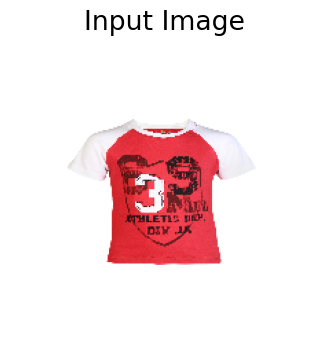

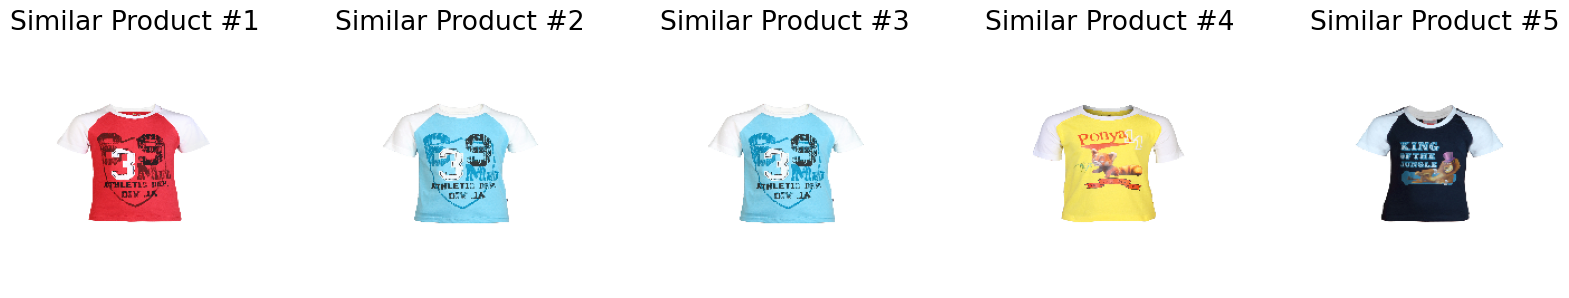

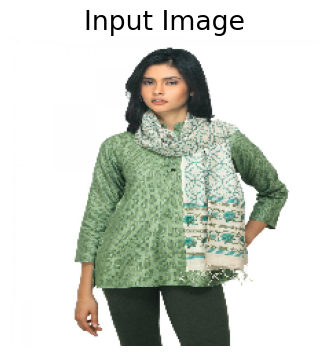

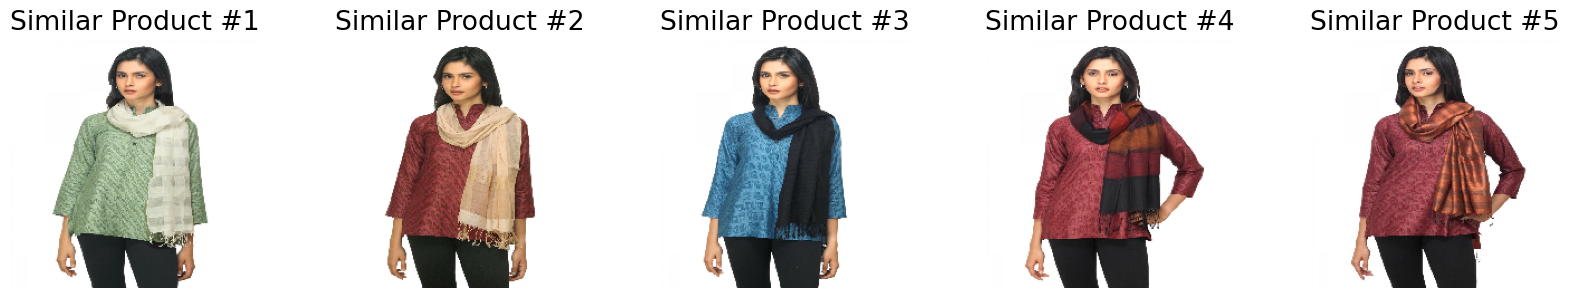

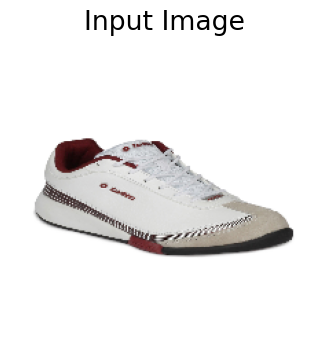

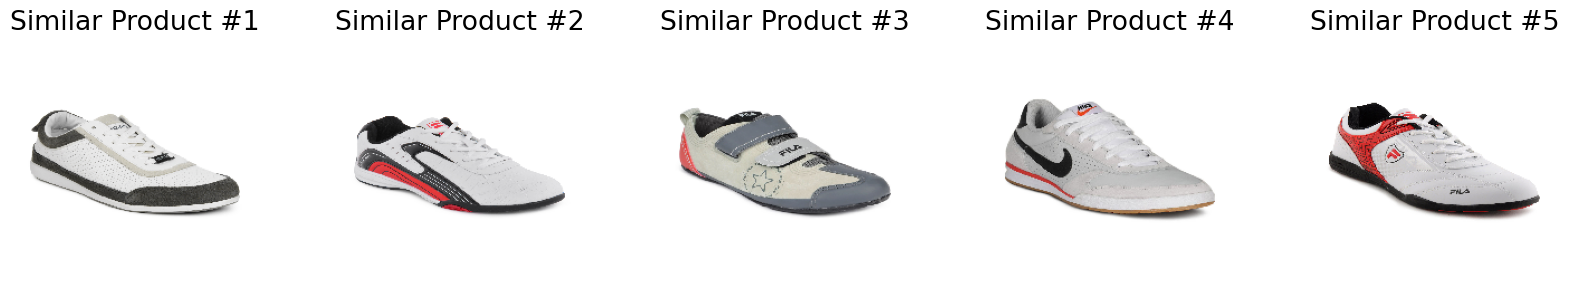

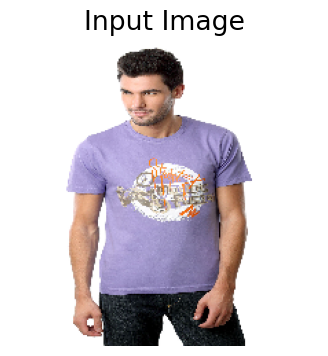

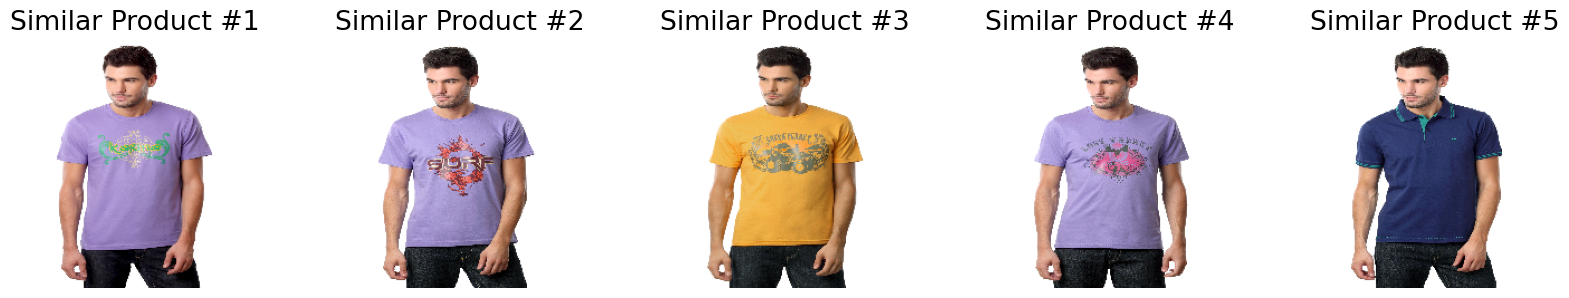

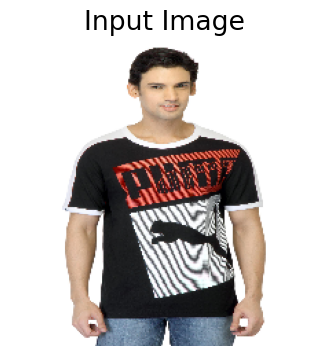

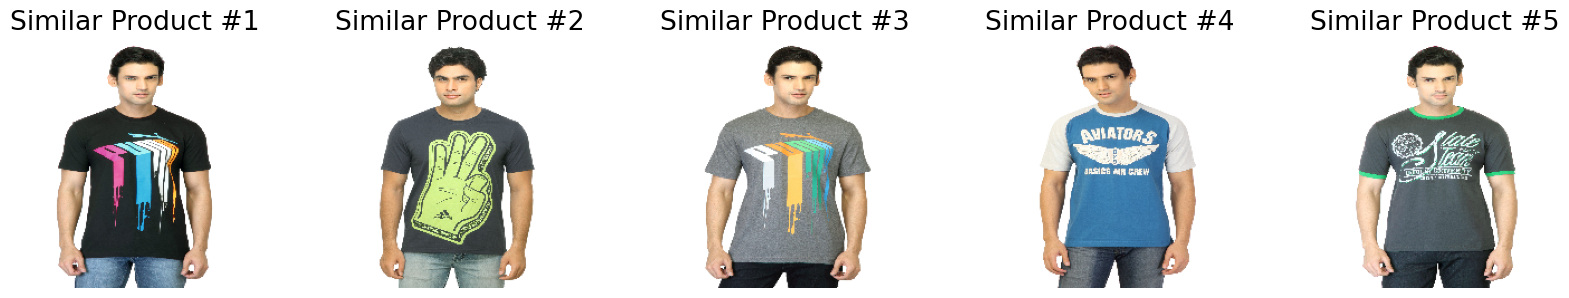

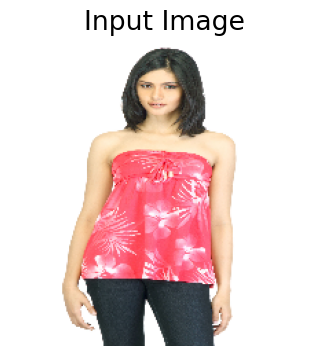

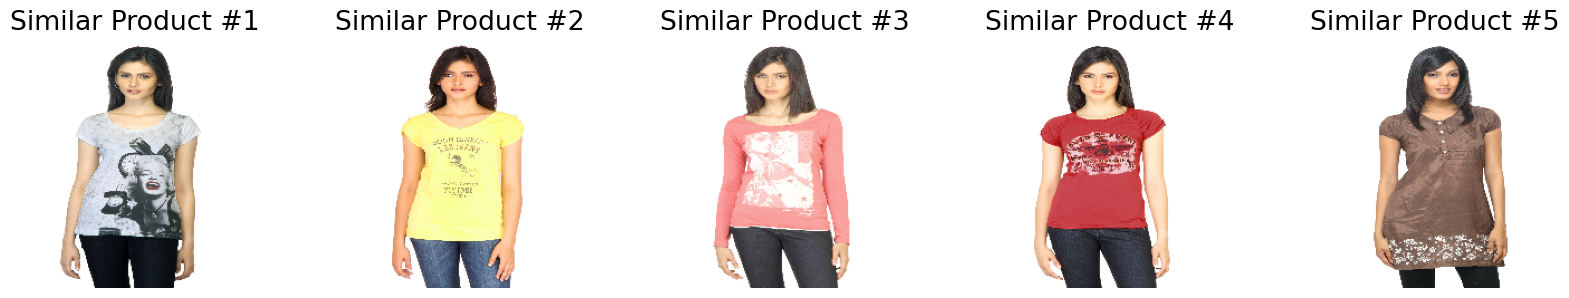

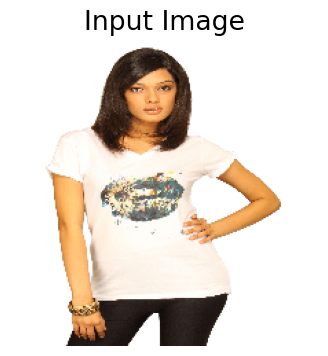

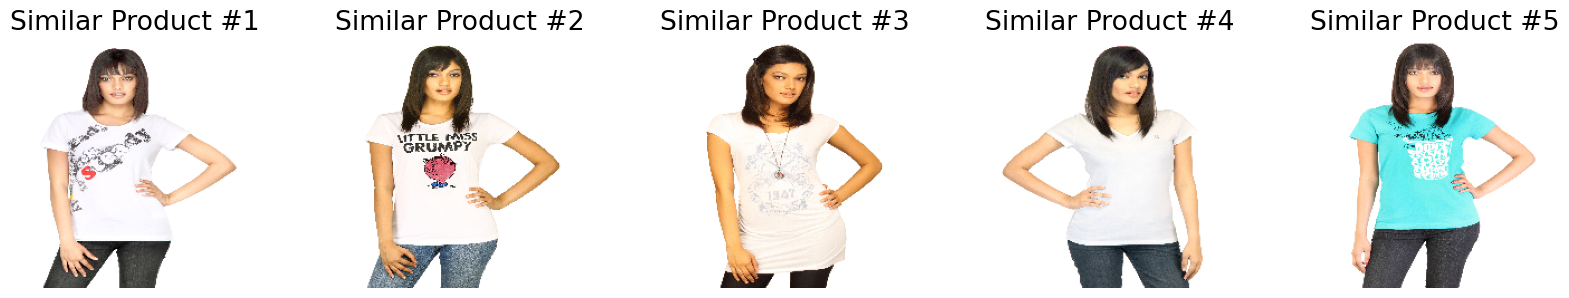

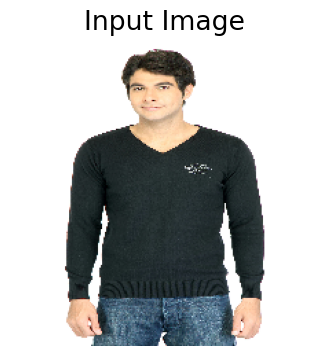

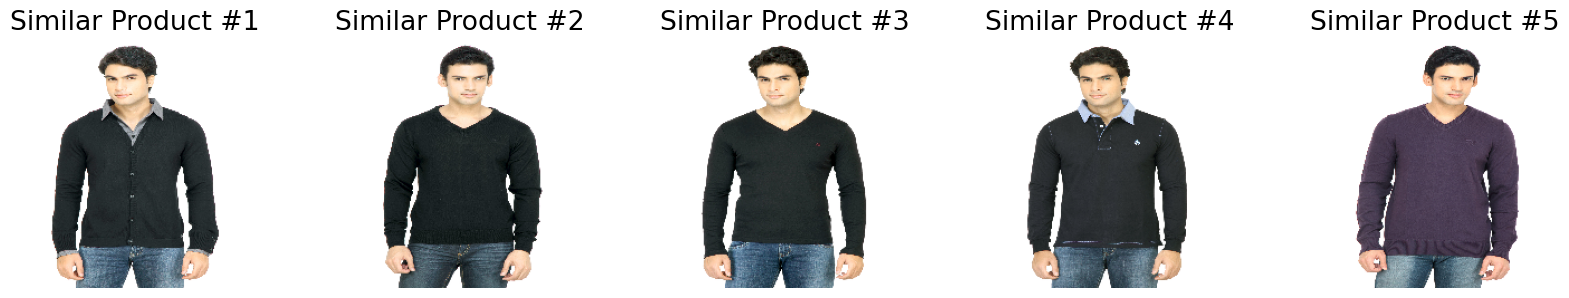

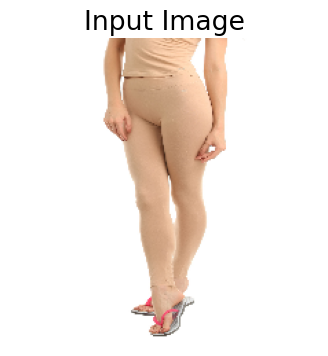

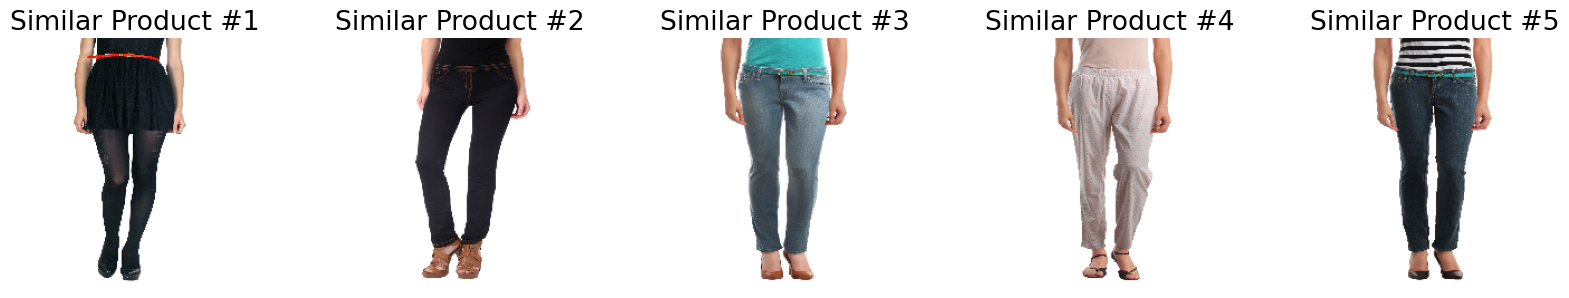

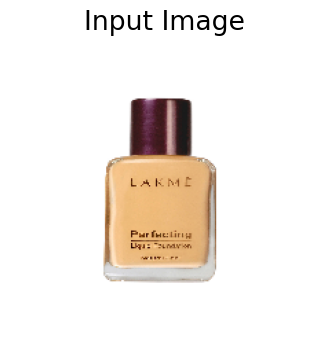

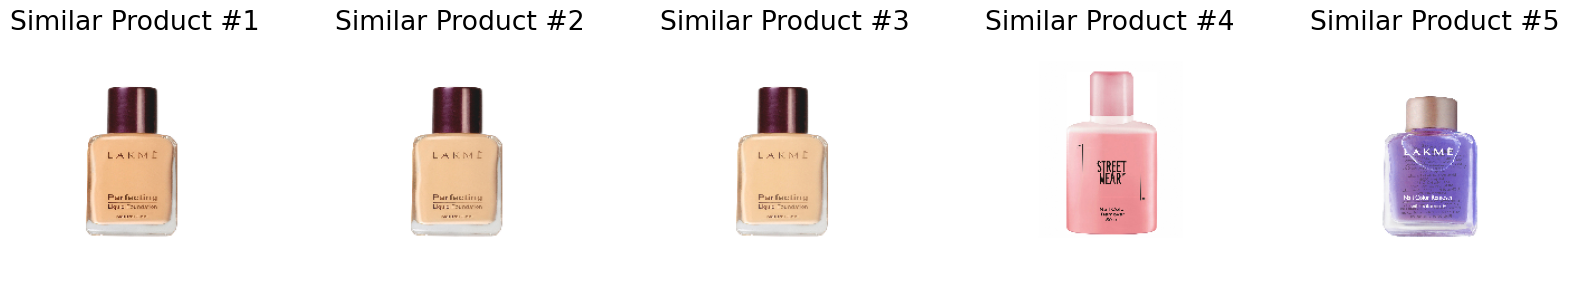

In [17]:
for _ in range(10):
    i = random.randint(0,len(styles_df))
    img1 = read_img(styles_df.loc[i,'filename'])
    dist, index = nearest_neighbours.kneighbors(X=X[i,:].reshape(1,-1))
    plt.figure(figsize = (4 , 4))
    plt.imshow(img1)
    plt.title("Input Image")
    plt.axis('off')
   
    plt.figure(figsize = (20 , 20))
    for i in range(1,6):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = read_img(styles_df.loc[index[0][i],'filename'])
        plt.imshow(image)
        plt.title(f'Similar Product #{i}')
        plt.axis('off')